## Hashtags, Likes, and Upload Dates in Affecting Youtube Viewership 

### Background: 
This dataset contains the stats for the top trending Youtube videos in the U.S. and Canada from Nov 2017 to June 2018. This dataset was downloaded from Kaggle and I only used U.S. and Canada. 


### Hypotheses + Methods:
1) What tags are the best for views? (What tags should you use for your video?)
    - Natural Language Processing: Count Vectorization
2) Do people comment more on videos they like or dislike? (Should you make a bad/controversial or good/well-liked video?)
    - Linear Regression
3) Do days of the week affect viewership? (what's the best time to upload your video?)
    - Basic visuals/boxplot
    
    
### Summary of Findings
1) The most popular hashtags appear to be customized hashtags from high-level influencers

2) Well-liked/good videos appear to result in more comment engagement

3) Friday appears to be the best day to upload your videos for most viewership



### Limitations:
Due to the dataset being restricted to half a year, it's susceptible to outlier effect rather than patterns/trends. Also, there are multiple foreign languages in this dataset. 

In [1]:
cd

/Users/crissyc


In [2]:
cd Desktop/Project4

/Users/crissyc/Desktop/Project4


In [3]:
## Importing
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
#Setting up our datasets 

us = pd.read_csv('USvideos.csv')
ca = pd.read_csv('CAvideos.csv')
yt_df = us.append(ca)

#Checking to see if DF appended properly
print(us.shape)
print(ca.shape)
print(yt_df.shape)

(40949, 16)
(40881, 16)
(81830, 16)


## Exploratory Data Analysis

In [5]:
#Exploratory Data Analysis Overview

yt_df.head(5)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
yt_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [7]:
yt_df.dtypes

#It looks like we will have to convert the date objects to datetime format

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [8]:
#Using this to get rid of scientific notation format
pd.options.display.float_format = "{:.2f}".format

yt_df.describe([.25,.50,.75,.90])

,category_id,views,likes,dislikes,comment_count
count,81830.00,81830.00,81830.00,81830.00,81830.00
mean,20.38,1754414.58,56939.11,2861.01,6746.30
std,7.19,5785450.73,187915.61,24554.80,30604.27
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,178194.50,3301.00,136.00,505.00
50%,24.00,496160.00,12834.00,438.00,1550.00
75%,24.00,1355387.50,40961.75,1421.00,4626.00
90%,26.00,3437722.00,125102.50,4514.00,13430.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


# Question #1: Which tags performed best overall?

In [9]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

In [10]:
# We are still using the Youtube dataframe we were using earlier

# We are creating a new column to turn youtube views percentiles into categories so that we can use multinominal model:
# 0 - min to 90th percentile
# 1 - 91st to max percentile

def top90views(x):
    if 0 < x <= 3437722:
        return 0
    else:
        return 1

yt_df['top90views'] = yt_df['views'].apply(top90views)

# Define X and y.
X = yt_df.tags
y = yt_df.top90views

# Split the dataframe into training and testing sets - 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [11]:
# Instantiate
vect = CountVectorizer(lowercase=True)

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

print(X_train_dtm.shape)
print(vect.get_feature_names()[-10:]) 


# Use Naive Bayes to predict the viewership 
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy
print((metrics.accuracy_score(y_test, y_pred_class)))
print(y_test.value_counts())

# Our model did pretty well in terms of detecting the tags that result in viewership in top percentile range.

(61372, 57091)
['회동', '회오리젤리', '효리네민박', '효정', '훈련', '휘인', '희유희', '히트맨', '힙합', '２４時間前']
0.8997947013393294
0    18436
1     2022
Name: top90views, dtype: int64


In [12]:
vect.vocabulary_


{'faisla': 15560,
 'episode': 14793,
 '26': 1043,
 'ary': 3912,
 'digital': 12669,
 '25': 1024,
 'drama': 13445,
 'watch': 46640,
 'sonia': 40351,
 'mishal': 28457,
 'gohar': 18202,
 'mumtaz': 29344,
 'ali': 2678,
 'abbas': 1790,
 'tesla': 42933,
 'roadster': 36637,
 '2020': 934,
 'fastest': 15754,
 'productioncar': 34347,
 '60': 1395,
 'launch': 24959,
 'mkbhd': 28574,
 'vs': 46317,
 'aangan': 1747,
 '06': 58,
 'qavi': 34870,
 'khan': 23757,
 'samina': 37680,
 'ahmed': 2397,
 'isra': 21970,
 'ghaqzal': 17841,
 'waseem': 46611,
 'zainab': 48161,
 'qayyum': 34871,
 'ep': 14752,
 'steelers': 41090,
 'robbed': 36658,
 'by': 7474,
 'nfl': 30272,
 'of': 31132,
 'win': 47162,
 'jesse': 22552,
 'james': 22235,
 'patriots': 32423,
 'highlights': 19983,
 'tom': 43770,
 'brady': 6725,
 'big': 5770,
 'ben': 5443,
 'riche': 36429,
 'or': 31470,
 'vidéo': 45912,
 'drole': 13549,
 'achat': 1963,
 'objets': 31028,
 'top': 43854,
 '10': 89,
 'les': 25292,
 'lama': 24730,
 'faché': 15504,
 'listes': 25

In [13]:
X_test_dtm.toarray()
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

In [14]:
# Ignoring tags that appear less than twice reduces the accuracy of our model just slightly. 
# Maybe this is due to top performing youtubers using their own customized hashtag? 🤷🏻‍
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

('Features: ', 10000)
('Accuracy: ', 0.8929025320168149)


## Question 2a: What's the correlation between comments and viewership?
## Question 2b: Do people comment more on videos they like or dislike?

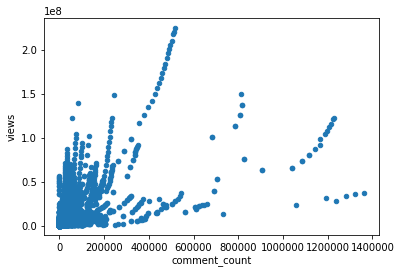

In [15]:
# Are comments and viewership correlated? Probably, but let's check:
yt_df.plot(kind='scatter', x='comment_count', y='views')

#looks weird..

In [16]:
# Let's look at the rest of the features in relation to views. 

print((yt_df.corr()['views'])) 


#It looks like views are strongly correlated with likes. 

category_id              -0.16
views                     1.00
likes                     0.84
dislikes                  0.49
comment_count             0.63
comments_disabled         0.00
ratings_disabled          0.01
video_error_or_removed   -0.00
top90views                0.55
Name: views, dtype: float64


In [17]:
# Comment count vs. features 
print((yt_df.corr()['comment_count'])) 

#It looks like comments show a stronger correlation to likes than dislikes. 

category_id              -0.08
views                     0.63
likes                     0.81
dislikes                  0.68
comment_count             1.00
comments_disabled        -0.03
ratings_disabled         -0.01
video_error_or_removed   -0.00
top90views                0.34
Name: comment_count, dtype: float64


In [25]:
#Linear Regression
from sklearn.linear_model import LinearRegression

#instantiate:
lr = LinearRegression()

#Create X and y
feature_cols = ['likes','dislikes','comment_count']
X = yt_df[feature_cols]
y = yt_df.views

#Fit 
lr.fit(X,y)

#
print(lr.score(X,y))
print(lr.intercept_)
print(lr.coef_)
# 1 like = 32 views
# 1 dislike = 73 views
# 1 comment = -83 views (? - perhaps this is due to non-unique)

0.7661426167986529
248281.72906133533
[ 32.67733355  73.19558523 -83.58626139]


In [28]:
yt_df['view_proportion']=yt_df['comment_count'] / yt_df['views']
yt_df.view_proportion

0       0.02
1       0.01
2       0.00
3       0.01
4       0.01
5       0.01
6       0.00
7       0.00
8       0.00
9       0.01
10      0.00
11      0.01
12      0.01
13      0.01
14      0.01
15      0.02
16      0.00
17      0.00
18      0.02
19      0.01
20      0.02
21      0.00
22      0.01
23      0.00
24      0.01
25      0.01
26      0.01
27      0.01
28      0.00
29      0.00
        ... 
40851   0.00
40852   0.00
40853   0.00
40854   0.01
40855   0.01
40856   0.01
40857   0.00
40858   0.00
40859   0.00
40860   0.00
40861   0.00
40862   0.01
40863   0.02
40864   0.01
40865   0.02
40866   0.00
40867   0.00
40868   0.00
40869   0.01
40870   0.00
40871   0.01
40872   0.01
40873   0.01
40874   0.00
40875   0.00
40876   0.02
40877   0.00
40878   0.01
40879   0.01
40880   0.00
Name: view_proportion, Length: 81830, dtype: float64

## Question 3: Do days of the week affect viewership? (what's the best time to upload your video?)

In [19]:
# Reviewing data again
yt_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,top90views
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0


In [20]:
# Clean up data import
from datetime import datetime

#Convert publish date to datetime format
yt_df['Date'] = pd.to_datetime(yt_df.publish_time)

#Create new column to show day of the week  0- Monday,  6- Sunday
yt_df['dayofweek'] = yt_df['Date'].apply(lambda time: time.dayofweek)

print(yt_df.dtypes)
yt_df.head()


video_id                               object
trending_date                          object
title                                  object
channel_title                          object
category_id                             int64
publish_time                           object
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
top90views                              int64
Date                      datetime64[ns, UTC]
dayofweek                               int64
dtype: object


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,top90views,Date,dayofweek
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0,2017-11-13 17:13:01+00:00,0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0,2017-11-13 07:30:00+00:00,0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0,2017-11-12 19:05:24+00:00,6
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0,2017-11-13 11:00:04+00:00,0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0,2017-11-12 18:01:41+00:00,6


       category_id        views      likes   dislikes  comment_count  \
count     81830.00     81830.00   81830.00   81830.00       81830.00   
mean         20.38   1754414.58   56939.11    2861.01        6746.30   
std           7.19   5785450.73  187915.61   24554.80       30604.27   
min           1.00       549.00       0.00       0.00           0.00   
25%          17.00    178194.50    3301.00     136.00         505.00   
50%          24.00    496160.00   12834.00     438.00        1550.00   
75%          24.00   1355387.50   40961.75    1421.00        4626.00   
max          43.00 225211923.00 5613827.00 1674420.00     1361580.00   

       top90views  dayofweek  
count    81830.00   81830.00  
mean         0.10       2.82  
std          0.30       1.91  
min          0.00       0.00  
25%          0.00       1.00  
50%          0.00       3.00  
75%          0.00       4.00  
max          1.00       6.00  


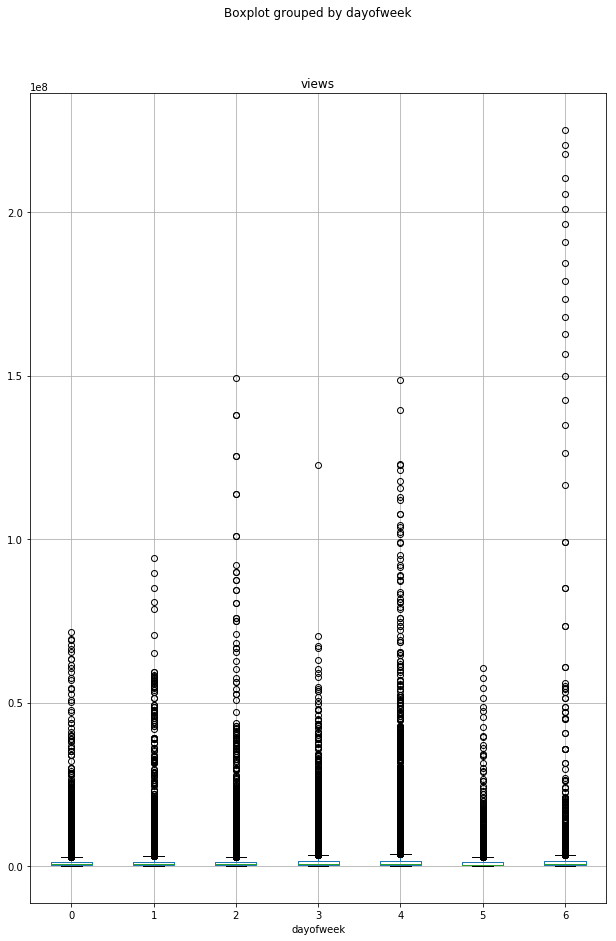

In [21]:
# Visualizing 
print(yt_df.describe())

yt_df.boxplot(column='views', by='dayofweek', figsize=(10, 15));


# Based on the box plot, it appears that Friday is the best day of the week 

In [22]:
# Extra/bonus - Tried KNN... Didn't really work out. 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['views','likes','dislikes','comment_count']

X = yt_df[feature_cols]
y = yt_df.views 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.08035976146250856
